<>:50: SyntaxWarning: invalid escape sequence '\$'
<>:50: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1064654111.py:50: SyntaxWarning: invalid escape sequence '\$'
  df['total_usd_prize'] = df['total_usd_prize'].replace('[\$,]', '', regex=True).astype(float)


📂 Please upload one or more CSV datasets...


Saving Esports - Tournaments with largest prize pools.csv to Esports - Tournaments with largest prize pools (3).csv
✅ File uploaded: Esports - Tournaments with largest prize pools (3).csv

✅ All CSV files loaded and combined!

   GameID          TournamentName   StartDate     EndDate                City  \
0   37294  The International 2019    08/15/19    08/25/19            Shanghai   
1   29385  The International 2018    08/15/18    08/25/18           Vancouver   
2   24181  The International 2017  08-02-2017  08-12-2017             Seattle   
3   19287  The International 2016  08-03-2016    08/13/16             Seattle   
4   12894  The International 2015  08-03-2015  08-08-2015  Seattle/Washington   

         Country  TeamPlay  TotalUSDPrize  
0          China         1    34330069.00  
1         Canada         1    25532177.00  
2  United States         1    24687919.00  
3  United States         1    20770460.00  
4  United States         1    18429613.05  
<class 'pandas.core.fr

/tmp/ipython-input-1064654111.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
/tmp/ipython-input-1064654111.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
/tmp/ipython-input-1064654111.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='total_usd_prize', data=df, palette='mako')


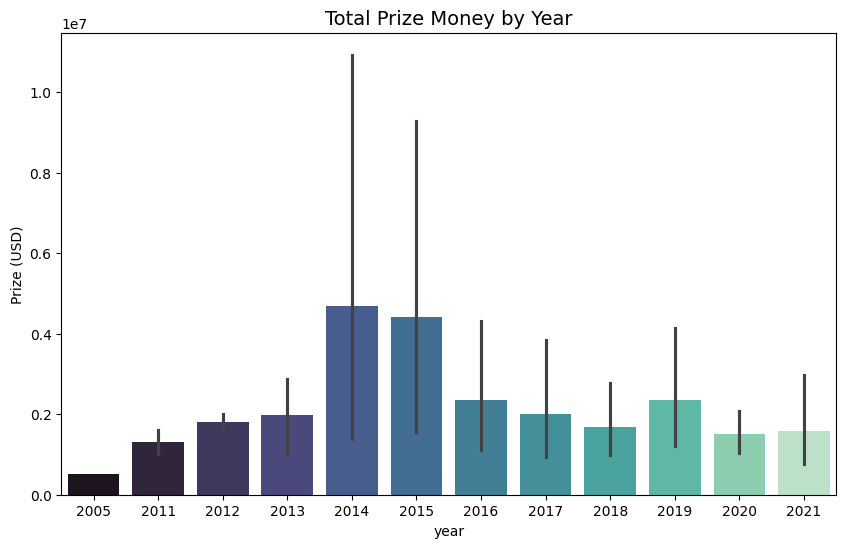

/tmp/ipython-input-1064654111.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


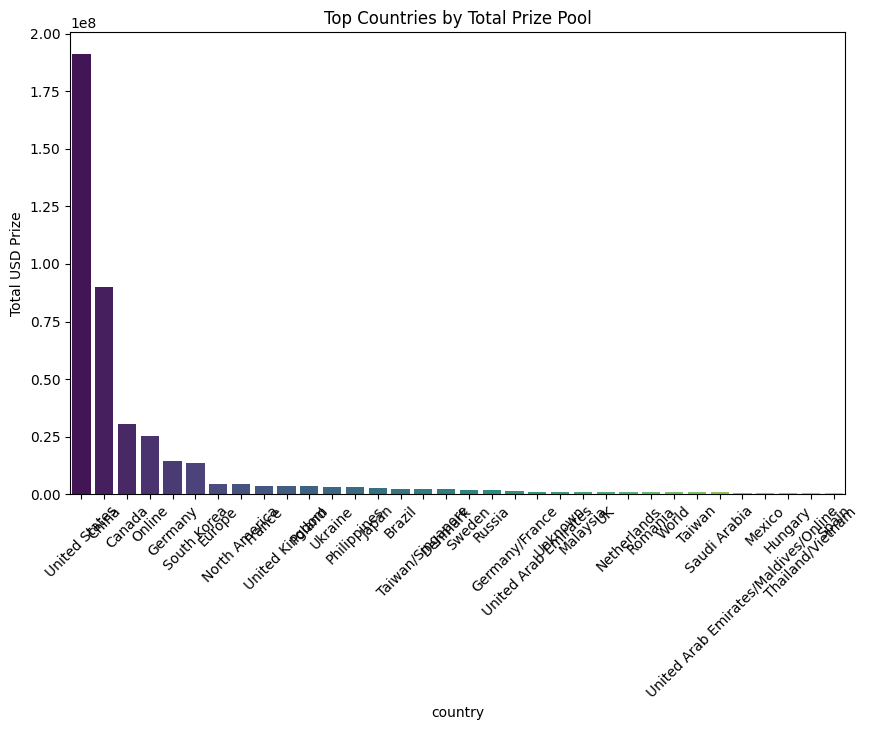


🏆 Team Leaderboard by Total Prize Money:
   team_play  total_usd_prize
0          1     3.815816e+08
1          0     3.643528e+07


/tmp/ipython-input-1064654111.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team_play', y='total_usd_prize', data=team_leaderboard.head(10), palette='coolwarm')


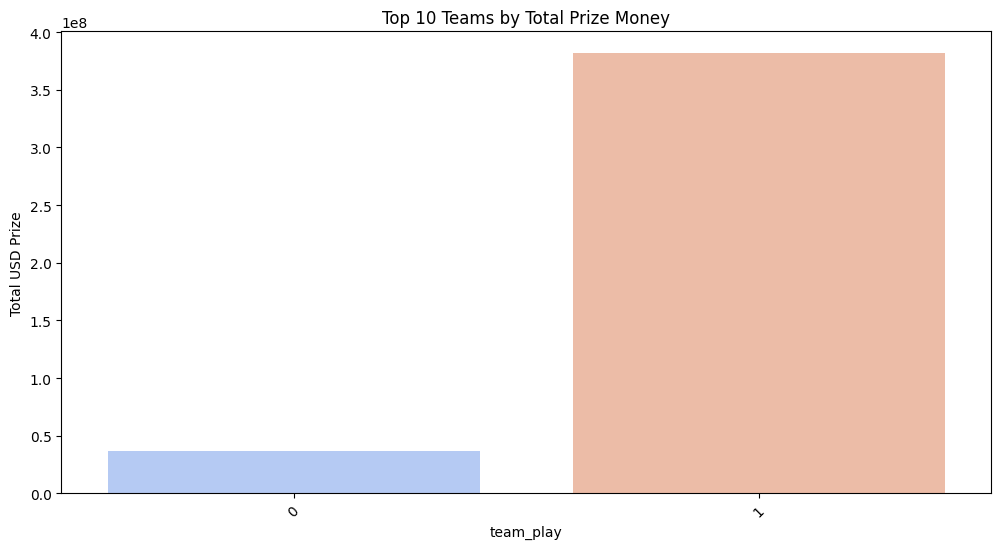

/tmp/ipython-input-1064654111.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tournament_name', y='total_usd_prize', data=top_tournaments.head(10), palette='Spectral')


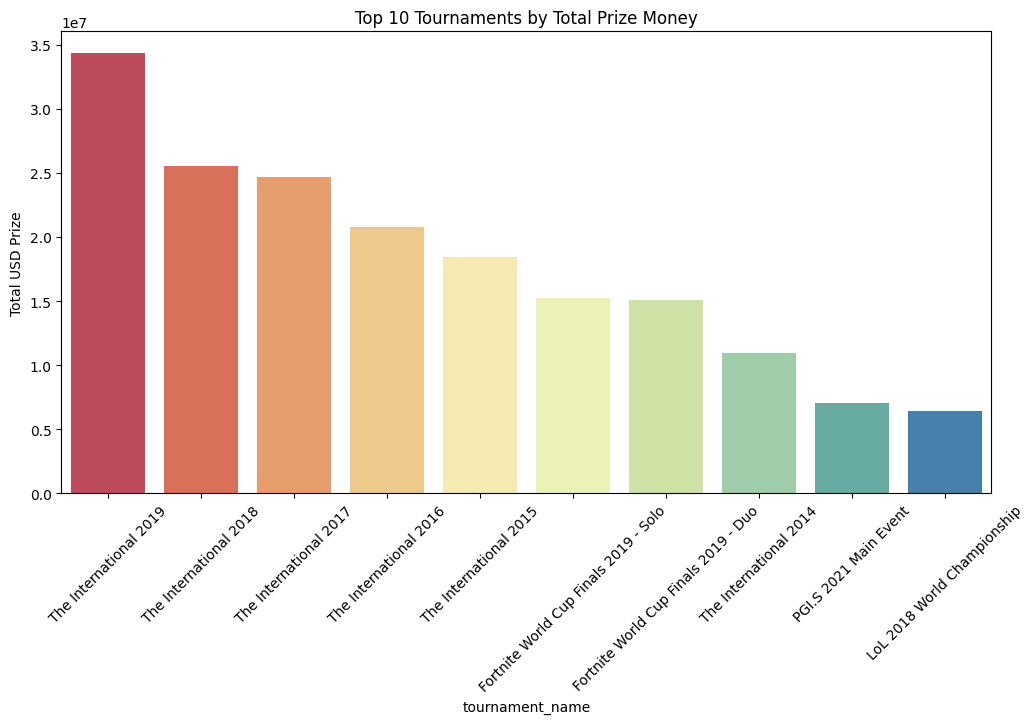


✅ Processed CSV saved as 'processed_esports.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Processed data stored in SQLite database 'esports_data.db'

📊 Summary Statistics:
            game_id           start_date             end_date   team_play  \
count    200.000000                  200                  200  200.000000   
mean   29932.600000  2018-05-05 21:00:00  2018-05-26 04:55:12    0.875000   
min     1999.000000  2005-11-20 00:00:00  2005-11-22 00:00:00    0.000000   
25%    23679.500000  2017-05-22 00:00:00  2017-06-02 06:00:00    1.000000   
50%    30032.500000  2018-08-15 00:00:00  2018-09-08 12:00:00    1.000000   
75%    38780.750000  2019-09-28 06:00:00  2019-10-27 00:00:00    1.000000   
max    46189.000000  2021-03-13 00:00:00  2021-04-11 00:00:00    1.000000   
std    10792.607739                  NaN                  NaN    0.331549   

       total_usd_prize  duration_days         year  
count     2.000000e+02     200.000000   200.000000  
mean      2.090084e+06      20.330000  2017.830000  
min       5.100000e+05     -13.000000  2005.000000  
25%       

In [4]:
# 🏆 Esports Tournament Data Pipeline (Batch + Leaderboard + Storage + Visualization)
# Author: Shreya Phadke

# STEP 1: INSTALL & IMPORT LIBRARIES
!pip install pandas matplotlib seaborn sqlalchemy --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import files
from sqlalchemy import create_engine

# STEP 2: INGESTION (UPLOAD MULTIPLE CSV FILES)
print("📂 Please upload one or more CSV datasets...")
uploaded = files.upload()

dfs = []
for fn in uploaded.keys():
    print(f"✅ File uploaded: {fn}")
    df_temp = pd.read_csv(fn)
    dfs.append(df_temp)

# Combine all uploaded files into one DataFrame
raw_df = pd.concat(dfs, ignore_index=True)
print("\n✅ All CSV files loaded and combined!\n")
print(raw_df.head())

# STEP 3: EXTRACT & INITIAL CLEANING
raw_df.info()

# Rename columns for consistency
df = raw_df.rename(columns={
    'GameID': 'game_id',
    'TournamentName': 'tournament_name',
    'StartDate': 'start_date',
    'EndDate': 'end_date',
    'City': 'city',
    'Country': 'country',
    'TeamPlay': 'team_play',
    'TotalUSDPrize': 'total_usd_prize'
})

# STEP 4: TRANSFORMATION
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df['city'] = df['city'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['total_usd_prize'] = df['total_usd_prize'].replace('[\$,]', '', regex=True).astype(float)
df['duration_days'] = (df['end_date'] - df['start_date']).dt.days
df['year'] = df['start_date'].dt.year

print("\n✅ Data after transformation:")
print(df.head())

# STEP 5: VALIDATION
print("\n🔍 Missing values:\n", df.isnull().sum())
print("\n🔍 Data types:\n", df.dtypes)

# STEP 6: ANALYTICS & VISUALIZATION

# 6a: Prize Money by Year
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='total_usd_prize', data=df, palette='mako')
plt.title('Total Prize Money by Year', fontsize=14)
plt.ylabel('Prize (USD)')
plt.show()

# 6b: Top Countries by Total Prize
top_countries = df.groupby('country')['total_usd_prize'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top Countries by Total Prize Pool')
plt.xticks(rotation=45)
plt.ylabel('Total USD Prize')
plt.show()

# 6c: Top Teams by Total Prize
if 'team_play' in df.columns:
    team_leaderboard = df.groupby('team_play')['total_usd_prize'].sum().sort_values(ascending=False).reset_index()
    print("\n🏆 Team Leaderboard by Total Prize Money:")
    print(team_leaderboard.head(10))

    plt.figure(figsize=(12,6))
    sns.barplot(x='team_play', y='total_usd_prize', data=team_leaderboard.head(10), palette='coolwarm')
    plt.title('Top 10 Teams by Total Prize Money')
    plt.xticks(rotation=45)
    plt.ylabel('Total USD Prize')
    plt.show()

# 6d: Top Tournaments by Total Prize
top_tournaments = df.groupby('tournament_name')['total_usd_prize'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='tournament_name', y='total_usd_prize', data=top_tournaments.head(10), palette='Spectral')
plt.title('Top 10 Tournaments by Total Prize Money')
plt.xticks(rotation=45)
plt.ylabel('Total USD Prize')
plt.show()

# STEP 7: LOAD (STORE PROCESSED DATA)
output_csv = 'processed_esports.csv'
df.to_csv(output_csv, index=False)
print(f"\n✅ Processed CSV saved as '{output_csv}'")
files.download(output_csv)

# Optional: Save to SQLite database
engine = create_engine('sqlite:///esports_data.db', echo=False)
df.to_sql('tournaments', con=engine, if_exists='replace', index=False)
print("✅ Processed data stored in SQLite database 'esports_data.db'")

# STEP 8: PIPELINE SUMMARY
print("\n📊 Summary Statistics:")
print(df.describe())

print("\n🎯 Pipeline Execution Complete — Data ready for analytics, leaderboards, and historical insights!")